In [ ]:
"""
Code Challenge
  Name: 
    Telecom Churn Analysis
  Filename: 
    telecom_churn.py
  Problem Statement:
    Read the telecom_churn.csv file and perform the following task :

https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383
https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas       
https://github.com/guipsamora/pandas_exercises/
"""

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("pd_csv/churn.csv")
df.head(10)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [51]:
## cleaning the data of churn column
d = {'False.' : False, 'True.' : True}
df["Churn?"] = df["Churn?"].map(d)


In [52]:
df.info()       ## show all count of all except nan value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null bool
dtypes: bool(1), float64(8), int64(8), object(4)
memory usage: 524.2+ KB


In [46]:
##shows basic statistical characteristics of each numerical feature
df.describe()  


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# non-numerical features, one has to explicitly indicate data types 
df.describe(include=['object', 'bool'])


,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,344-4022,no,no,False.
freq,106,1,3010,2411,2850


In [11]:
#sorted by the value of one of the variables and store in new data frame
df_sorted= df.sort_values(by='Day Charge')
df_sorted.head(10)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True.
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False.
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False.
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False.
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False.
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,...,90,21.81,169.4,88,7.62,7.7,9,2.08,1,False.
2252,NH,148,408,333-7449,no,no,0,17.6,121,2.99,...,125,13.74,203.1,82,9.14,10.6,6,2.86,1,False.
3046,MI,110,510,357-5784,no,no,0,18.9,92,3.21,...,81,21.96,109.6,74,4.93,14.8,4,4.00,1,False.
1621,SC,138,510,370-9533,no,yes,21,19.5,149,3.32,...,109,11.98,179.7,111,8.09,7.9,1,2.13,0,False.
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,...,96,17.55,228.1,64,10.26,6.5,7,1.76,1,False.


In [12]:
#We can sort the data using 2 or more columns:
df_sorted= df.sort_values( by=['Day Mins','Churn?'], ascending = [True,False])
df_sorted.head(10)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True.
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False.
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False.
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False.
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False.
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,...,90,21.81,169.4,88,7.62,7.7,9,2.08,1,False.
2252,NH,148,408,333-7449,no,no,0,17.6,121,2.99,...,125,13.74,203.1,82,9.14,10.6,6,2.86,1,False.
3046,MI,110,510,357-5784,no,no,0,18.9,92,3.21,...,81,21.96,109.6,74,4.93,14.8,4,4.00,1,False.
1621,SC,138,510,370-9533,no,yes,21,19.5,149,3.32,...,109,11.98,179.7,111,8.09,7.9,1,2.13,0,False.
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,...,96,17.55,228.1,64,10.26,6.5,7,1.76,1,False.


In [13]:
# 1.What are average values of numerical features for churned users?
df[ df['Churn?']=='True.' ].mean()


Account Length    102.664596
Area Code         437.817805
VMail Message       5.115942
Day Mins          206.914079
Day Calls         101.335404
Day Charge         35.175921
Eve Mins          212.410145
Eve Calls         100.561077
Eve Charge         18.054969
Night Mins        205.231677
Night Calls       100.399586
Night Charge        9.235528
Intl Mins          10.700000
Intl Calls          4.163561
Intl Charge         2.889545
CustServ Calls      2.229814
dtype: float64

In [15]:
#2. How much time (on average) do churned users spend on the phone during daytime?
## churn == true means loyal user else fake user.

print( df[df['Churn?']=='True.']['Day Mins'].mean(),'mins' )


206.91407867494814 mins


In [19]:
#3. What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?
## use brackets when applying condition
val= df[ (df["Int'l Plan"]=="no") & (df['Churn?']=='False.') ]['Intl Mins']
print( val.max(),'mins' )


18.9 mins


In [21]:
'''or'''
grouped= df.groupby(["Int'l Plan", "Churn?"])['Intl Mins'].agg(np.max)
print(grouped[0],'mins')


18.9 mins


In [53]:
#The loc method is used for indexing by name, while iloc() is used for indexing
# by number.
print ( df.loc[0:5, 'State':'Area Code'] )
print('*'*40)

print( df.iloc[0:5, 0:3] )
print('*'*40)

#first line of the data frame
print( df[:1] )
print('*'*40)

# the last line of the data frame
print( df[-1:] )


  State  Account Length  Area Code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510
****************************************
  State  Account Length  Area Code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
****************************************
  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3          2.7   

In [54]:
#To apply functions to each column, use apply()
df.apply(np.max) 


State                   WY
Account Length         243
Area Code              510
Phone             422-9964
Int'l Plan             yes
VMail Plan             yes
VMail Message           51
Day Mins             350.8
Day Calls              165
Day Charge           59.64
Eve Mins             363.7
Eve Calls              170
Eve Charge           30.91
Night Mins             395
Night Calls            175
Night Charge         17.77
Intl Mins               20
Intl Calls              20
Intl Charge            5.4
CustServ Calls           9
Churn?                True
dtype: object

In [55]:
#4. select all states starting with W

df[df['State'].apply(lambda state: state[0] == 'W')].head()


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True


In [56]:
df["Int'l Plan"].value_counts()


no     3010
yes     323
Name: Int'l Plan, dtype: int64

In [44]:
#5.The map method can be used "to replace values" in a column by passing
# a dictionary of the form {old_value: new_value}

d = {'no' : False, 'yes' : True}
df["Int'l Plan"] = df["Int'l Plan"].map(d)
df["Int'l Plan"].head(10)


0    False
1    False
2    False
3     True
4     True
5     True
6    False
7     True
8    False
9     True
Name: Int'l Plan, dtype: bool

In [62]:
'''Or'''
d = {'no' : False, 'yes' : True}
df = df.replace({'VMail Plan': d})
df['VMail Plan'].head(10)


0     True
1     True
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9     True
Name: VMail Plan, dtype: bool

In [63]:
'''Grouping

"""f.groupby(by=grouping_columns)[columns_to_show].function()"""
1. First, the groupby method divides the grouping_columns by their values. They 
become a new index in the resulting dataframe.
2. Then, columns of interest are selected (columns_to_show). If columns_to_show 
is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per 
selected columns.
'''
#6. group the data according to the values of the Churn variable and display statistics
# of three columns in each group

columns_to_show = ['Day Mins', 'Eve Mins', 'Night Mins']


In [65]:
df.groupby(['Churn?'])[columns_to_show].describe(percentiles=[])


Day Mins                                           Eve Mins  \
          count        mean        std  min    50%    max    count   
Churn?                                                               
False.   2850.0  175.175754  50.181655  0.0  177.2  315.6   2850.0   
True.     483.0  206.914079  68.997792  0.0  217.6  350.8    483.0   

                                                  Night Mins              \
              mean        std   min    50%    max      count        mean   
Churn?                                                                     
False.  199.043298  50.292175   0.0  199.6  361.8     2850.0  200.133193   
True.   212.410145  51.728910  70.9  211.3  363.7      483.0  205.231677   

                                        
              std   min     50%    max  
Churn?                                  
False.  51.105032  23.2  200.25  395.0  
True.   47.132825  47.4  204.80  354.9

In [66]:
df.groupby(['Churn?'])[columns_to_show].agg([np.min, np.max, np.mean, np.std ])


Day Mins                               Eve Mins                     \
           amin   amax        mean        std     amin   amax        mean   
Churn?                                                                      
False.      0.0  315.6  175.175754  50.181655      0.0  361.8  199.043298   
True.       0.0  350.8  206.914079  68.997792     70.9  363.7  212.410145   

                  Night Mins                                
              std       amin   amax        mean        std  
Churn?                                                      
False.  50.292175       23.2  395.0  200.133193  51.105032  
True.   51.728910       47.4  354.9  205.231677  47.132825

In [69]:
## Summary tables :
#how the observations in our sample are distributed in the context of two 
#variables - Churn and International plan. To do so, we can build a contingency
#table using the crosstab method:

print ( pd.crosstab(df['Churn?'], df["Int'l Plan"]) )

pd.crosstab(df['Churn?'], df['VMail Plan'], normalize=True)*100  ## for percentage


Int'l Plan    no  yes
Churn?               
False.      2664  186
True.        346  137


VMail Plan,False,True
Churn?,,
False.,60.246025,25.262526
True.,12.091209,2.400240


In [70]:
'''
pivot tables: 
the pivot_table method takes the following parameters:
values – a list of variables to calculate statistics for,
index – a list of variables to group data by,
aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.
'''
#7. look at the average number of day, evening, and night calls by area code

df.pivot_table(['Day Calls', 'Eve Calls', 'Night Calls'], ['Area Code'], aggfunc='mean')


,Day Calls,Eve Calls,Night Calls
Area Code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [71]:
'''
DataFrame transformations (inserting the column in data set)
'''
#8. calculate the total number of calls for all users
## \ for new line
df['Total Calls'] = df['Day Calls'] + df['Eve Calls'] + \
                    df['Night Calls'] + df['Intl Calls']

#9. calculate the total call charge for all users
df['Total Charge'] = df['Day Charge'] + df['Eve Charge'] + \
                     df['Night Charge'] + df["Intl Charge"]
df.head()


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Calls,Total Charge
0,KS,128,415,382-4657,no,True,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,303,75.56
1,OH,107,415,371-7191,no,True,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,332,59.24
2,NJ,137,415,358-1921,no,False,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,333,62.29
3,OH,84,408,375-9999,yes,False,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,255,66.80
4,OK,75,415,330-6626,yes,False,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,359,52.09


In [72]:
#To delete columns or rows, use the drop method

# get rid of just created columns
df.drop(['Total Charge', 'Total Calls'], axis=1, inplace=True) 

# and here’s how you can delete rows
df.drop([1, 2]).head() 


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
3,OH,84,408,375-9999,yes,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,False,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,True,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.


"\nWe see that, with International Plan, the churn rate is much higher, which is\n an interesting observation! Perhaps large and poorly controlled expenses with\n international calls are very conflict-prone and lead to dissatisfaction among \n the telecom operator's customers.\n"

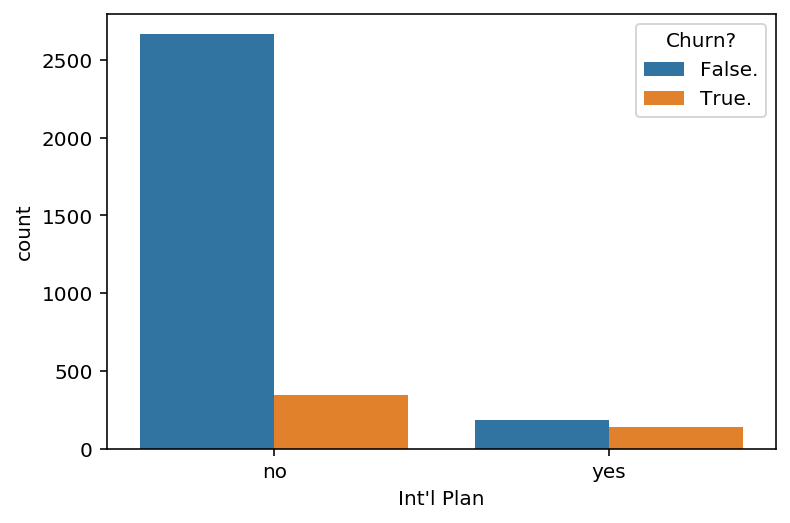

In [74]:
'''
(2). First attempt at predicting telecom churn
1. how churn rate is related to the International plan feature. We'll do this
   using a crosstab contingency table and also through visual analysis with 
   Seaborn
'''
import seaborn as sns
pd.crosstab(df['Churn?'], df["Int'l Plan"], margins=True)

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

sns.countplot(x="Int'l Plan", hue='Churn?', data=df)
'''
We see that, with International Plan, the churn rate is much higher, which is
 an interesting observation! Perhaps large and poorly controlled expenses with
 international calls are very conflict-prone and lead to dissatisfaction among 
 the telecom operator's customers.
'''


CustServ Calls    0     1    2    3    4   5   6  7  8  9   All
Churn?                                                         
False.          605  1059  672  385   90  26   8  4  1  0  2850
True.            92   122   87   44   76  40  14  5  1  2   483
All             697  1181  759  429  166  66  22  9  2  2  3333


"\nAlthough it's not so obvious from the summary table, it's easy to see from\nthe above plot that the churn rate increases sharply from 4 customer service\ncalls and above.\n"

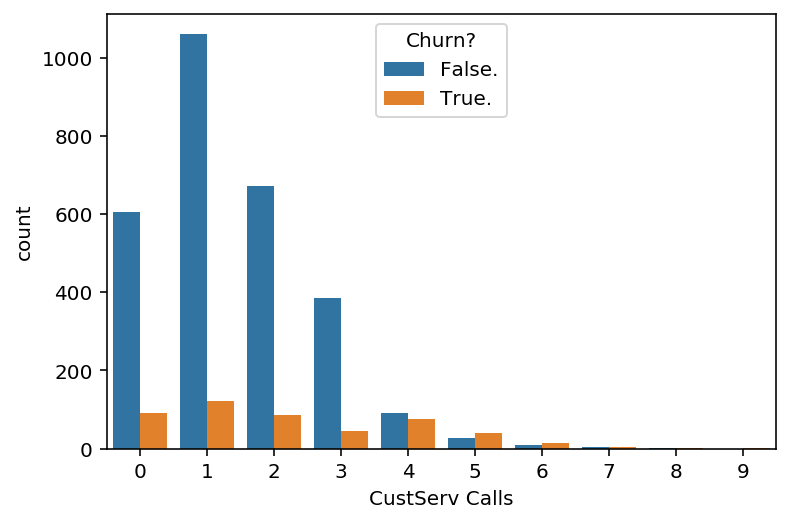

In [75]:
#2. let's look at another important feature – Customer service calls. Let's also
#   make a summary table and a picture.
print( pd.crosstab(df['Churn?'], df['CustServ Calls'], margins=True) )

sns.countplot(x='CustServ Calls', hue='Churn?', data=df)
'''
Although it's not so obvious from the summary table, it's easy to see from
the above plot that the churn rate increases sharply from 4 customer service
calls and above.
'''


Churn?              False.  True.   All
Many_service_calls                     
0                     2721    345  3066
1                      129    138   267
All                   2850    483  3333


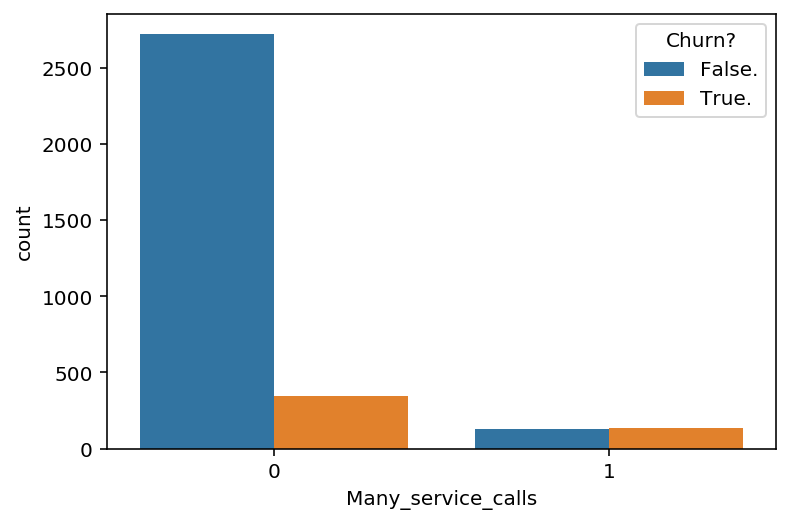

In [77]:
#3.Now let's add a binary feature to our DataFrame – Customer service calls > 3.
# And once again, let's see how it relates to churn.

df['Many_service_calls'] = (df['CustServ Calls'] > 3).astype('int')
print( pd.crosstab(df['Many_service_calls'], df['Churn?'], margins=True) )

sns.countplot(x='Many_service_calls', hue='Churn?', data=df)


In [80]:
#4.Let's construct another contingency table that relates Churn with both 
#  International plan and freshly created Many_service_calls.

print( pd.crosstab(df['Many_service_calls'] & df["Int'l Plan"] , df['Churn?']) )
'''
Therefore, predicting that a customer is not loyal (Churn=1) in the case when
the number of calls to the service center is greater than 3 and the International
Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of
85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got 
through this very simple reasoning serves as a good starting point (baseline) 
for the further machine learning models that we will build.
'''


Churn?  False.  True.
row_0                
False     2721    345
True       129    138


'\nTherefore, predicting that a customer is not loyal (Churn=1) in the case when\nthe number of calls to the service center is greater than 3 and the International\nPlan is added (and predicting Churn=0 otherwise), we might expect an accuracy of\n85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got \nthrough this very simple reasoning serves as a good starting point (baseline) \nfor the further machine learning models that we will build.\n'